In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/rohit-sharma-centuries/rohit_sharma.csv


In [2]:
df = pd.read_csv('/kaggle/input/rohit-sharma-centuries/rohit_sharma.csv')
df.head()

,Century No.,Date,Score,Against,Pos.,Inn.,Cap. Yes/No,Out/Notout,Man Of Match,H/A/N,Result
0,1,06-11-2013,177,West Indies,6,2,0,0,1,Home,Won
1,2,14-11-2013,111,West Indies,6,2,0,1,0,Home,Won
2,3,24-11-2017,102,Sri Lanka,6,2,0,1,0,Home,Won
3,4,02-10-2019,176,South Africa,2,1,0,0,1,Home,Won
4,5,02-10-2019,127,South Africa,2,3,0,0,1,Home,Won


In [3]:
df.shape

(43, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Century No.   43 non-null     int64 
 1   Date          43 non-null     object
 2   Score         43 non-null     int64 
 3   Against       43 non-null     object
 4   Pos.          43 non-null     int64 
 5   Inn.          43 non-null     int64 
 6   Cap. Yes/No   43 non-null     int64 
 7   Out/Notout    43 non-null     int64 
 8   Man Of Match  43 non-null     int64 
 9   H/A/N         43 non-null     object
 10  Result        43 non-null     object
dtypes: int64(7), object(4)
memory usage: 3.8+ KB


In [5]:
df.describe()

,Century No.,Score,Pos.,Inn.,Cap. Yes/No,Out/Notout,Man Of Match
count,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000
mean,22.000000,136.930233,1.697674,1.534884,0.139535,0.325581,0.604651
std,12.556539,35.956585,1.389328,0.591561,0.350605,0.474137,0.494712
min,1.000000,100.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,11.500000,111.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,22.000000,125.000000,1.000000,1.000000,0.000000,0.000000,1.000000
75%,32.500000,151.000000,2.000000,2.000000,0.000000,1.000000,1.000000
max,43.000000,264.000000,6.000000,3.000000,1.000000,1.000000,1.000000


In [6]:
df.dtypes

Century No.      int64
Date            object
Score            int64
Against         object
Pos.             int64
Inn.             int64
Cap. Yes/No      int64
Out/Notout       int64
Man Of Match     int64
H/A/N           object
Result          object
dtype: object

# Data Cleaning

In [7]:
df.isnull().sum()

Century No.     0
Date            0
Score           0
Against         0
Pos.            0
Inn.            0
Cap. Yes/No     0
Out/Notout      0
Man Of Match    0
H/A/N           0
Result          0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df['Date'] = pd.to_datetime(df['Date'])


/tmp/ipykernel_20/3386729631.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


In [10]:
df['Year'] = df['Date'].dt.year

# Value Counts

In [11]:
df['Against'].value_counts()

Australia       9
Sri Lanka       8
South Africa    7
West Indies     6
England         5
Bangladesh      3
New Zealand     2
Pakistan        2
Zimbabwe        1
Name: Against, dtype: int64

In [12]:
df['Pos.'].value_counts()

1    29
2     9
6     3
4     2
Name: Pos., dtype: int64

In [13]:
df['Inn.'].value_counts()

1    22
2    19
3     2
Name: Inn., dtype: int64

In [14]:
df['Cap. Yes/No'].value_counts()

0    37
1     6
Name: Cap. Yes/No, dtype: int64

In [15]:
df['Out/Notout'].value_counts()

0    29
1    14
Name: Out/Notout, dtype: int64

In [16]:
df['Man Of Match'].value_counts()

1    26
0    17
Name: Man Of Match, dtype: int64

In [17]:
df['H/A/N'].value_counts()

Home       23
Away       12
Neutral     8
Name: H/A/N, dtype: int64

In [18]:
df['Result'].value_counts()

Won     34
Lost     8
Won      1
Name: Result, dtype: int64

In [19]:
df.head()

,Century No.,Date,Score,Against,Pos.,Inn.,Cap. Yes/No,Out/Notout,Man Of Match,H/A/N,Result,Year
0,1,2013-06-11,177,West Indies,6,2,0,0,1,Home,Won,2013
1,2,2013-11-14,111,West Indies,6,2,0,1,0,Home,Won,2013
2,3,2017-11-24,102,Sri Lanka,6,2,0,1,0,Home,Won,2017
3,4,2019-02-10,176,South Africa,2,1,0,0,1,Home,Won,2019
4,5,2019-02-10,127,South Africa,2,3,0,0,1,Home,Won,2019


# Visualization

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Text(0.5, 1.0, 'Pie Graph')

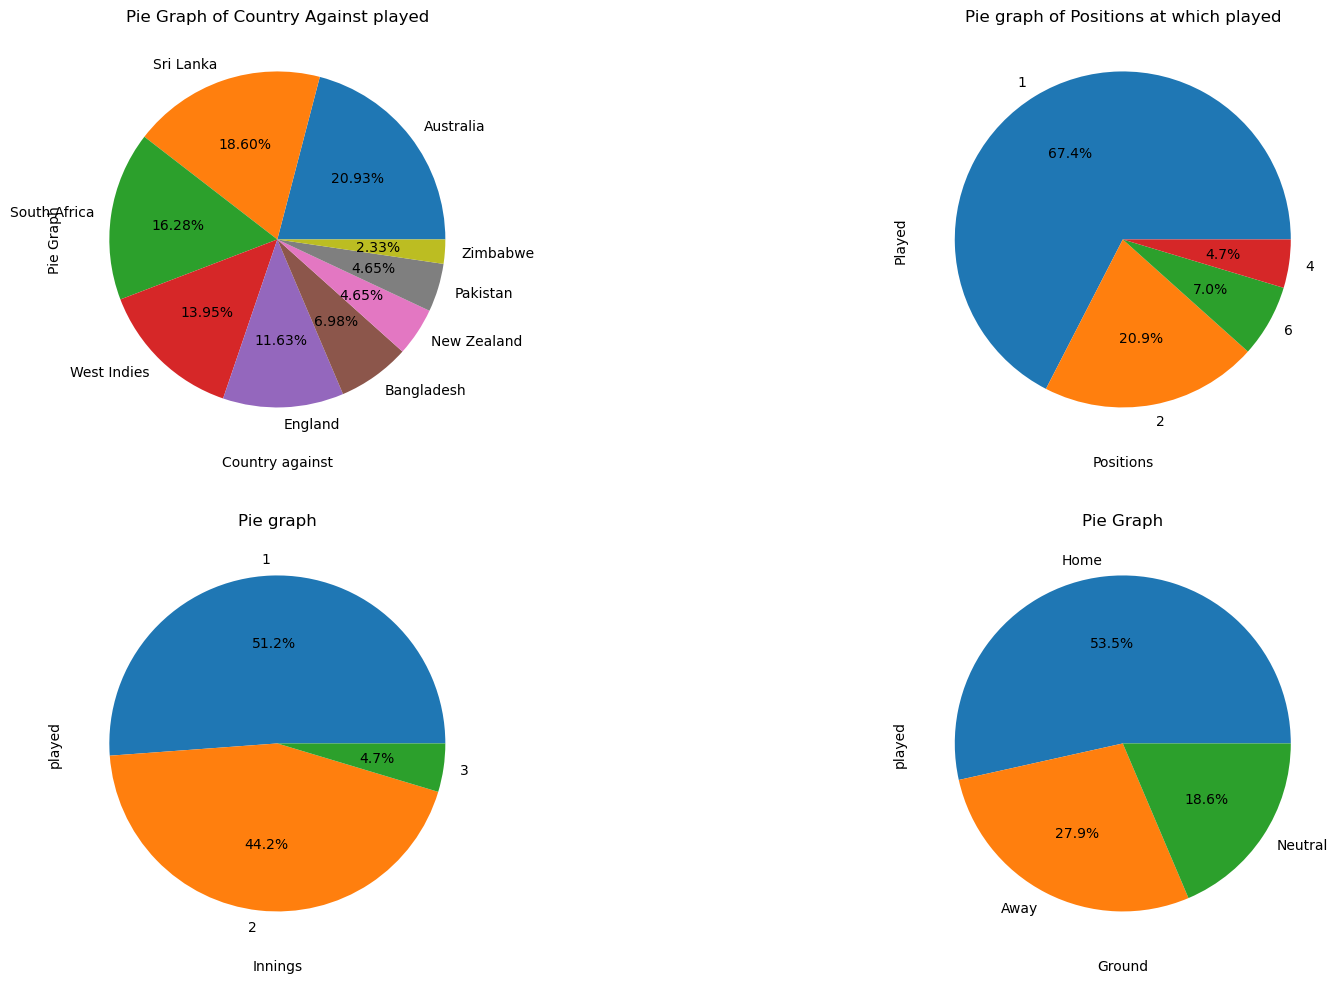

In [21]:
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
df['Against'].value_counts().plot.pie(autopct='%1.2f%%')
plt.xlabel('Country against')
plt.ylabel('Pie Graph')
plt.title('Pie Graph of Country Against played')
plt.subplot(2,2,2)
df['Pos.'].value_counts().plot.pie(autopct='%1.1f%%')
plt.xlabel('Positions')
plt.ylabel('Played')
plt.title('Pie graph of Positions at which played')
plt.subplot(2,2,3)
df['Inn.'].value_counts().plot.pie(autopct='%1.1f%%')
plt.xlabel('Innings')
plt.ylabel('played')
plt.title('Pie graph')
plt.subplot(2,2,4)
df['H/A/N'].value_counts().plot.pie(autopct='%1.1f%%')
plt.xlabel('Ground')
plt.ylabel('played')
plt.title('Pie Graph')

Text(0.5, 1.0, 'Pie Graph')

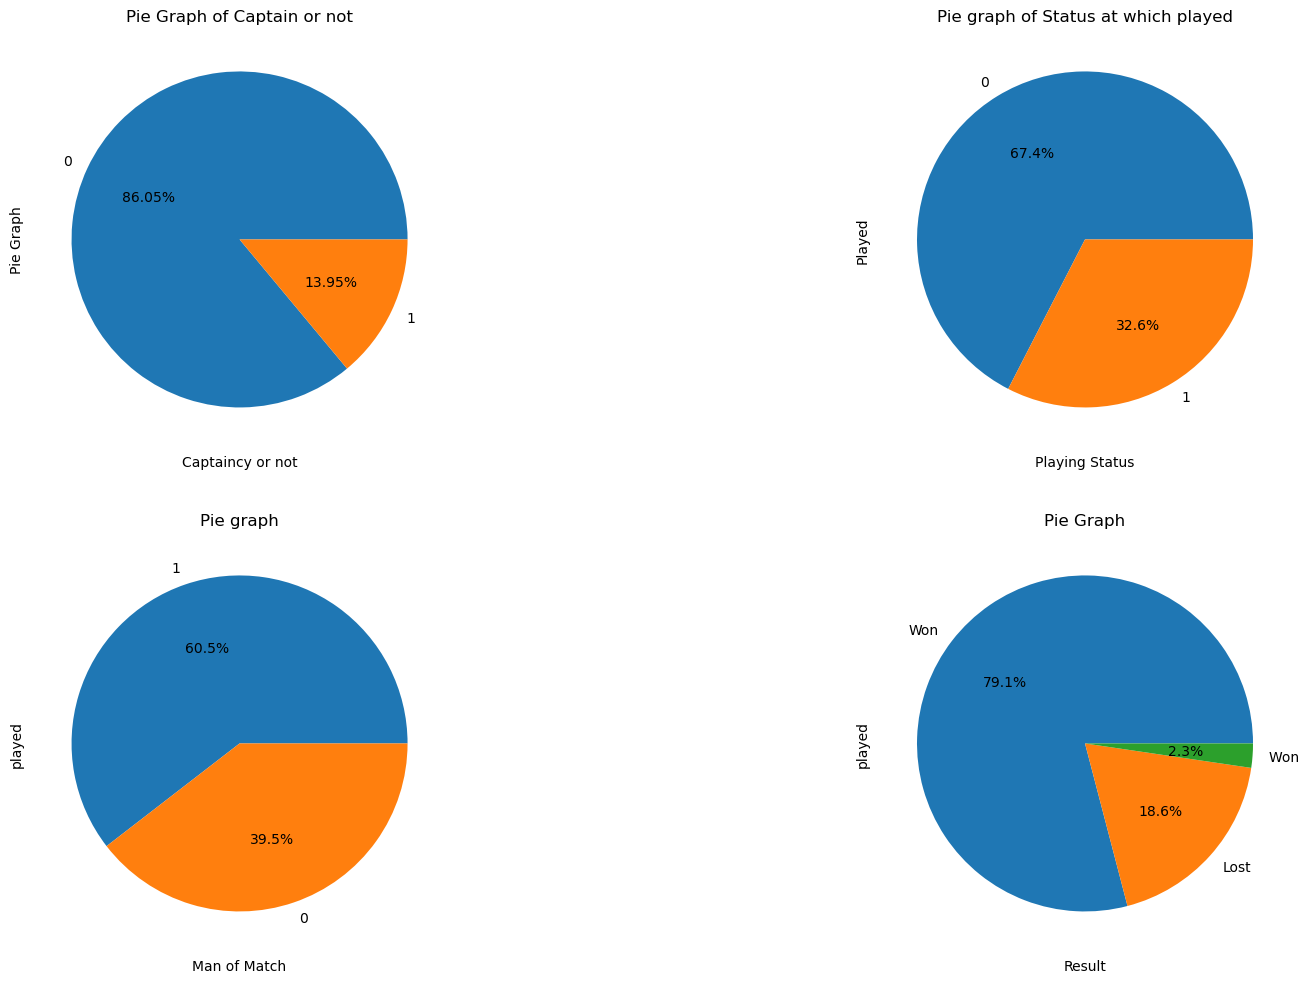

In [22]:
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
df['Cap. Yes/No'].value_counts().plot.pie(autopct='%1.2f%%')
plt.xlabel('Captaincy or not')
plt.ylabel('Pie Graph')
plt.title('Pie Graph of Captain or not')
plt.subplot(2,2,2)
df['Out/Notout'].value_counts().plot.pie(autopct='%1.1f%%')
plt.xlabel('Playing Status')
plt.ylabel('Played')
plt.title('Pie graph of Status at which played')
plt.subplot(2,2,3)
df['Man Of Match'].value_counts().plot.pie(autopct='%1.1f%%')
plt.xlabel('Man of Match')
plt.ylabel('played')
plt.title('Pie graph')
plt.subplot(2,2,4)
df['Result'].value_counts().plot.pie(autopct='%1.1f%%')
plt.xlabel('Result')
plt.ylabel('played')
plt.title('Pie Graph')

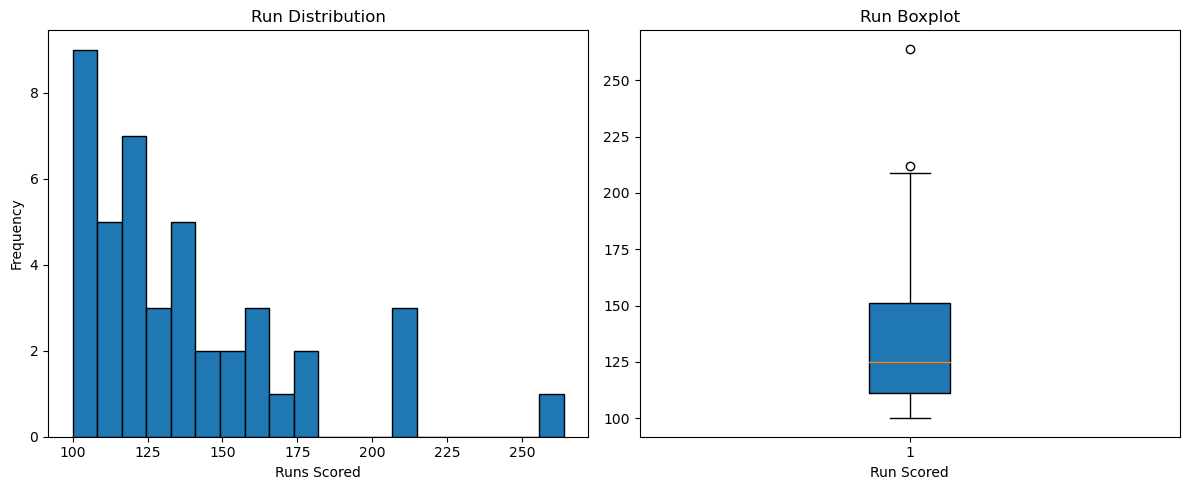

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Histogram
axes[0].hist(df['Score'], bins=20, edgecolor='black')
axes[0].set_xlabel('Runs Scored')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Run Distribution')

# Box Plot
axes[1].boxplot(df['Score'],patch_artist=True)
axes[1].set_xlabel('Run Scored')
# axes[1].set_yticklabels([''])
axes[1].set_title('Run Boxplot')

plt.tight_layout()
plt.show()

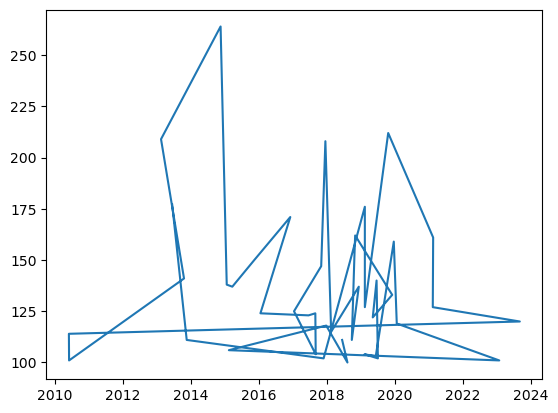

In [24]:
plt.plot(df['Date'],df['Score'])

In [25]:
df.head()

,Century No.,Date,Score,Against,Pos.,Inn.,Cap. Yes/No,Out/Notout,Man Of Match,H/A/N,Result,Year
0,1,2013-06-11,177,West Indies,6,2,0,0,1,Home,Won,2013
1,2,2013-11-14,111,West Indies,6,2,0,1,0,Home,Won,2013
2,3,2017-11-24,102,Sri Lanka,6,2,0,1,0,Home,Won,2017
3,4,2019-02-10,176,South Africa,2,1,0,0,1,Home,Won,2019
4,5,2019-02-10,127,South Africa,2,3,0,0,1,Home,Won,2019


<Axes: xlabel='Year', ylabel='Score'>

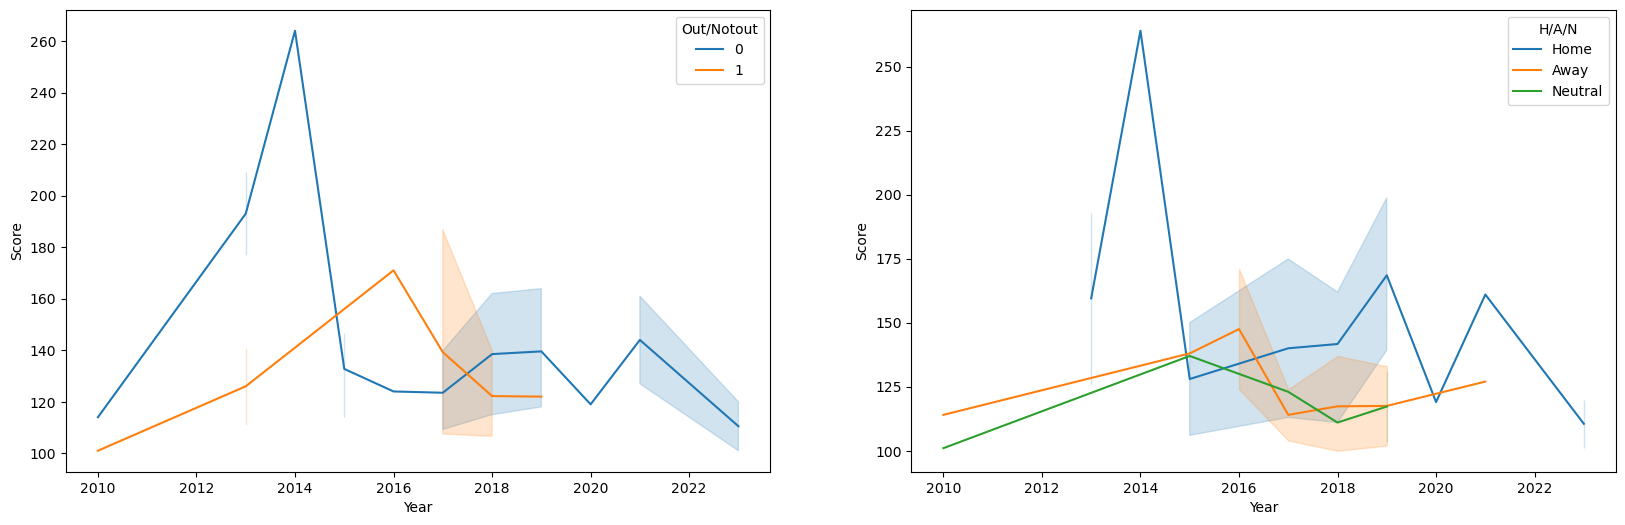

In [26]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.lineplot(x='Year',y='Score',data=df,hue='Out/Notout')
plt.subplot(1,2,2)
sns.lineplot(x='Year',y='Score',data=df,hue='H/A/N')

<Axes: xlabel='Year', ylabel='Score'>

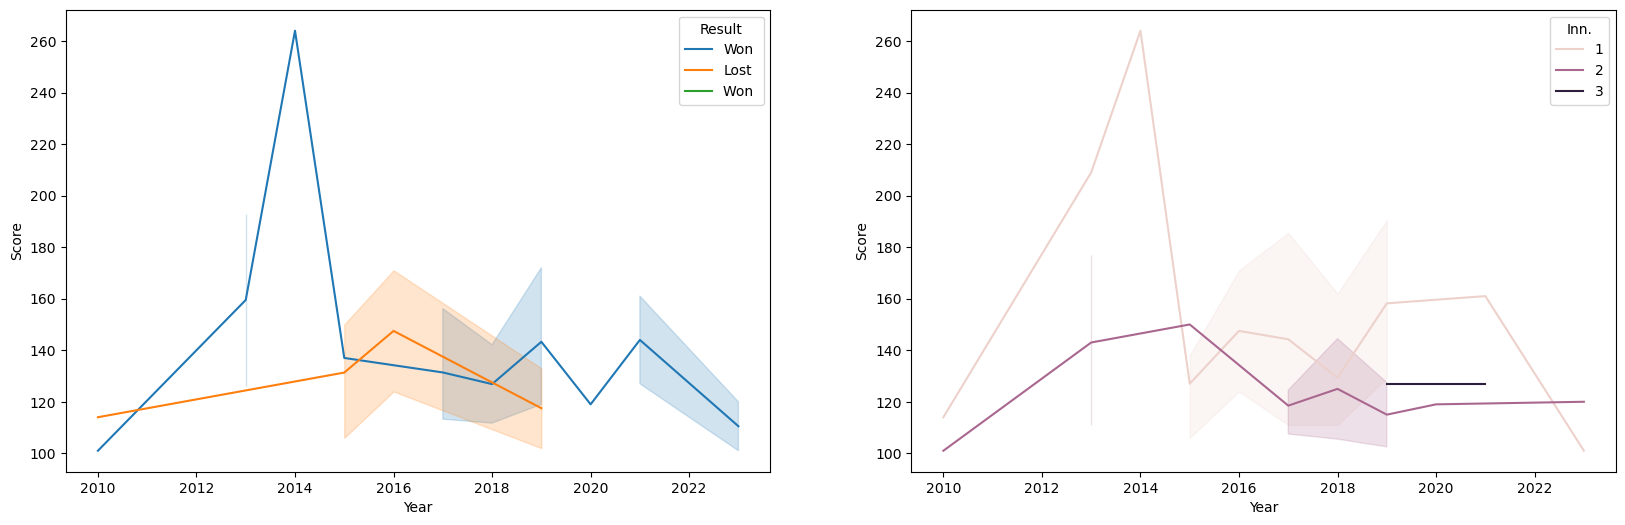

In [27]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.lineplot(x='Year',y='Score',data=df,hue='Result')
plt.subplot(1,2,2)
sns.lineplot(x='Year',y='Score',data=df,hue='Inn.')

<Axes: xlabel='Year', ylabel='Score'>

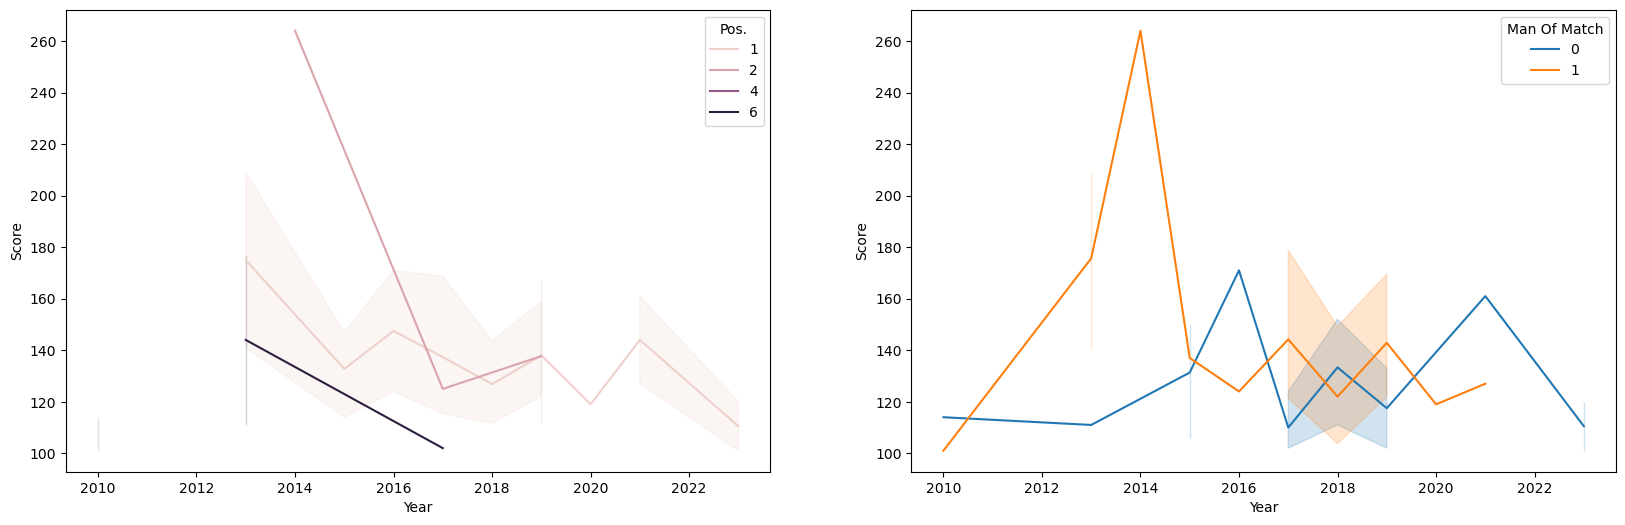

In [28]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.lineplot(x='Year',y='Score',data=df,hue='Pos.')
plt.subplot(1,2,2)
sns.lineplot(x='Year',y='Score',data=df,hue='Man Of Match')

<Axes: xlabel='Year', ylabel='Score'>

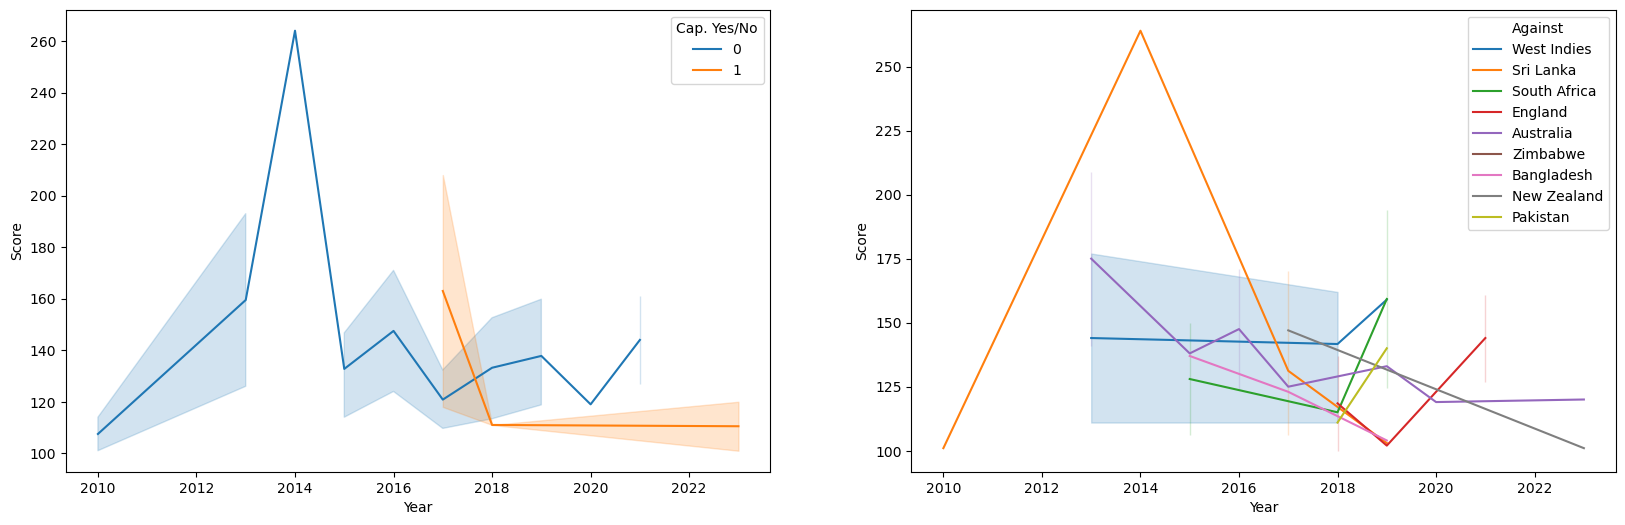

In [29]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.lineplot(x='Year',y='Score',data=df,hue='Cap. Yes/No')
plt.subplot(1,2,2)
sns.lineplot(x='Year',y='Score',data=df,hue='Against')

In [30]:
!pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 55.4 MB/s eta 0:00:00


In [31]:
import sweetviz as sv
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')
# Analyze data
my_report = sv.analyze(df)
print("Download Html file from output and Run in your Browser")

                                             |          | [  0%]   00:00 -> (? left)

Download Html file from output and Run in your Browser


In [32]:
my_report.show_html(filepath='/kaggle/working/SWEETVIZ_REPORT.html', open_browser=True)

Report /kaggle/working/SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [33]:
from IPython.display import HTML
HTML('<iframe src="SWEETVIZ_REPORT.html" width=1400 height=800></iframe>')

# Model 

In [34]:
df.columns

Index(['Century No.', 'Date', 'Score', 'Against', 'Pos.', 'Inn.',
       'Cap. Yes/No', 'Out/Notout', 'Man Of Match', 'H/A/N', 'Result', 'Year'],
      dtype='object')

In [35]:
columns = [ 'Score', 'Against', 'Pos.', 'Inn.',
       'Cap. Yes/No', 'Out/Notout', 'Man Of Match', 'H/A/N']

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.tree import DecisionTreeClassifier

In [37]:
from sklearn import set_config
set_config(display='diagram')

In [38]:
X = df[columns]
X.head()

,Score,Against,Pos.,Inn.,Cap. Yes/No,Out/Notout,Man Of Match,H/A/N
0,177,West Indies,6,2,0,0,1,Home
1,111,West Indies,6,2,0,1,0,Home
2,102,Sri Lanka,6,2,0,1,0,Home
3,176,South Africa,2,1,0,0,1,Home
4,127,South Africa,2,3,0,0,1,Home


In [39]:
Y = df.Result
Y.head()

0    Won
1    Won
2    Won
3    Won
4    Won
Name: Result, dtype: object

In [40]:
trf1 = ColumnTransformer([
    ('ohe_against',OneHotEncoder(sparse=False,handle_unknown='ignore'),[1]),
    ('ohe_ground',OneHotEncoder(sparse=False,handle_unknown='ignore'),[7])
],remainder='passthrough')

In [41]:
trf2 = ColumnTransformer([
    ('scale',MinMaxScaler(),slice(0,10))
],remainder='passthrough')

In [42]:
trf3 = SelectKBest(score_func=chi2,k=8)

In [43]:
trf4 = DecisionTreeClassifier()

In [44]:
pipe = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),
    ('trf3',trf3),
    ('trf4',trf4)
])

In [45]:
pipe.fit(X,Y)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_against',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [1]),
                                                 ('ohe_ground',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [7])])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 10, None))])),
                ('trf3',
                 SelectKBest(k=8,
                             score_func=<function chi2 at 0x7bd7663b8c10>)),
                ('trf4', DecisionTreeClassifier())])

In [46]:
pipe.named_steps

{'trf1': ColumnTransformer(remainder='passthrough',
                   transformers=[('ohe_against',
                                  OneHotEncoder(handle_unknown='ignore',
                                                sparse=False),
                                  [1]),
                                 ('ohe_ground',
                                  OneHotEncoder(handle_unknown='ignore',
                                                sparse=False),
                                  [7])]),
 'trf2': ColumnTransformer(remainder='passthrough',
                   transformers=[('scale', MinMaxScaler(), slice(0, 10, None))]),
 'trf3': SelectKBest(k=8, score_func=<function chi2 at 0x7bd7663b8c10>),
 'trf4': DecisionTreeClassifier()}

In [47]:
y_pred = pipe.predict(X)
y_pred

array(['Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won',
       'Lost', 'Won', 'Won', 'Won', 'Won', 'Lost', 'Won', 'Lost', 'Lost',
       'Lost', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won', 'Won',
       'Won', 'Won', 'Won', 'Lost', 'Won', 'Won ', 'Lost', 'Won', 'Won',
       'Won', 'Won', 'Won', 'Lost', 'Won', 'Won', 'Won'], dtype=object)

In [48]:
from sklearn.metrics import accuracy_score
accuracy_score(Y,y_pred)

1.0